In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018)
crime_2019_df = pd.read_csv(crime_2019)
crime_2020_df = pd.read_csv(crime_2020)
sa_postcodes_df = pd.read_csv(sa_postcodes)

crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])

In [2]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [3]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [4]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [5]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [6]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [7]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [8]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [9]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [10]:
#review updated dataframe
crime_postcode_merge_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227842,2020-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,15588.0,SA,138.565224,...,403041084.0,Morphett Vale - East,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
227843,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227844,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,13718.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0
227845,2020-12-31,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13720.0,SA,138.527677,...,404011090.0,Beverley,40401.0,Charles Sturt,404.0,Adelaide - West,1.0,1.0,1.0,1.0


In [11]:
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4','state'])

In [12]:
crime_postcode_merge_df

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,long,lat,dc,sa3name,sa4name,region,Lat_precise,Long_precise,SA2_NAME_2016,SA3_NAME_2016,SA4_NAME_2016
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,138.603897,-35.061705,SOMERTON PARK DC,Onkaparinga,Adelaide - South,R2,-35.067000,138.600000,Aberfoyle Park,Onkaparinga,Adelaide - South
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,Adelaide - Central and Hills,R2,-34.932829,138.603813,Adelaide,Adelaide City,Adelaide - Central and Hills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227842,2020-12-31,WOODCROFT,5162,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,138.565224,-35.112119,LONSDALE DC,Onkaparinga,Adelaide - South,R2,-35.118261,138.543736,Morphett Vale - East,Onkaparinga,Adelaide - South
227843,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1.0,138.527677,-34.883282,REGENCY PARK DC,Charles Sturt,Adelaide - West,R2,-34.881000,138.535000,Beverley,Charles Sturt,Adelaide - West
227844,2020-12-31,WOODVILLE,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1.0,138.527677,-34.883282,REGENCY PARK DC,Charles Sturt,Adelaide - West,R2,-34.881000,138.535000,Beverley,Charles Sturt,Adelaide - West
227845,2020-12-31,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,138.527677,-34.883282,REGENCY PARK DC,Charles Sturt,Adelaide - West,R2,-34.881000,138.535000,Beverley,Charles Sturt,Adelaide - West


In [13]:
#clean_crime_data_2018 = crime_2018_df.dropna(how='any')
#clean_crime_data_2019 = crime_2019_df.dropna(how='any')
#clean_crime_data_2020 = crime_2020_df.dropna(how='any')



In [14]:
crimes_2018_df = crime_postcode_merge_df.loc[(crime_postcode_merge_df["Reported Date"] >= "2018-01-01") & (crime_postcode_merge_df["Reported Date"] <= "2018-12-31")]
crimes_2019_df = crime_postcode_merge_df.loc[(crime_postcode_merge_df["Reported Date"] >= "2019-01-01") & (crime_postcode_merge_df["Reported Date"] <= "2019-12-31")]
crimes_2020_df = crime_postcode_merge_df.loc[(crime_postcode_merge_df["Reported Date"] >= "2020-01-01") & (crime_postcode_merge_df["Reported Date"] <= "2020-12-31")]

In [15]:
crimes_2018_df_new = crime_postcode_merge_df.groupby(pd.Grouper(key='Reported Date',freq='M')).sum()
crimes_2018_df_new

,Postcode - Incident,Offence count,long,lat,Lat_precise,Long_precise
Reported Date,,,,,,
2018-01-31,7266485,1623.0,1.960455e+05,-49138.869883,-49140.164970,1.960343e+05
2018-02-28,8166497,1838.0,2.204141e+05,-55251.414180,-55253.290685,2.203999e+05
2018-03-31,7982521,1858.0,2.150567e+05,-53878.793535,-53899.170235,2.150542e+05
2018-04-30,7889468,1786.0,2.131778e+05,-53447.506413,-53443.567781,2.131545e+05
2018-05-31,8268468,1895.0,2.230194e+05,-55872.730107,-55878.375726,2.230082e+05
2018-06-30,8025044,1891.0,2.165525e+05,-54241.729371,-54252.182279,2.165493e+05
2018-07-31,30683836,6930.0,8.276572e+05,-207471.087336,-207466.940769,8.274815e+05
2018-08-31,32701851,7422.0,8.811511e+05,-220749.212803,-220810.737326,8.811327e+05
2018-09-30,32391300,7444.0,8.752343e+05,-219442.235068,-219436.143669,8.751565e+05


In [54]:
total_2018_l1 = crimes_2018_df.groupby(["Offence Level 1 Description"])
total_2018_new_l1 = total_2018_l1.count()['Offence count']
total_2018_new_l1

Offence Level 1 Description
OFFENCES AGAINST PROPERTY      37982
OFFENCES AGAINST THE PERSON     8679
Name: Offence count, dtype: int64

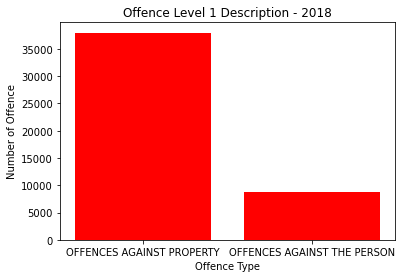

In [55]:
x_axis = total_2018_new_l1.index
y_axis = total_2018_new_l1.values
plt.bar(x_axis,y_axis, color = 'red')
plt.xticks(rotation = 0)
plt.title ('Offence Level 1 Description - 2018')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [52]:
total_2019_l1 = crimes_2019_df.groupby(["Offence Level 1 Description"])
total_2019_new_l1 = total_2019_l1.count()['Offence count']
total_2019_new_l1

Offence Level 1 Description
OFFENCES AGAINST PROPERTY      80501
OFFENCES AGAINST THE PERSON    16659
Name: Offence count, dtype: int64

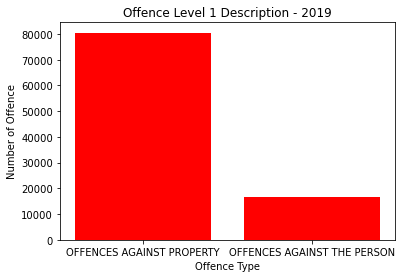

In [53]:
x_axis = total_2019_new_l1.index
y_axis = total_2019_new_l1.values
plt.bar(x_axis,y_axis, color = 'red')
plt.xticks(rotation = 0)
plt.title ('Offence Level 1 Description - 2019')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [56]:
total_2020_l1 = crimes_2020_df.groupby(["Offence Level 1 Description"])
total_2020_new_l1 = total_2020_l1.count()['Offence count']
total_2020_new_l1

Offence Level 1 Description
OFFENCES AGAINST PROPERTY      66958
OFFENCES AGAINST THE PERSON    17068
Name: Offence count, dtype: int64

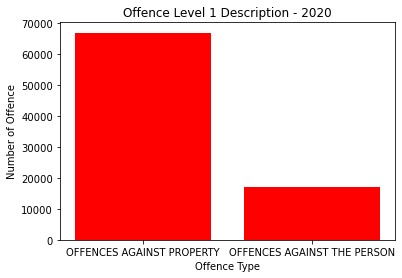

In [57]:
x_axis = total_2020_new_l1.index
y_axis = total_2020_new_l1.values
plt.bar(x_axis,y_axis, color = 'red')
plt.xticks(rotation = 0)
plt.title ('Offence Level 1 Description - 2020')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [22]:
#total_2018 = crimes_2018_df.groupby(["Offence Level 1 Description"])
#total_2018_new = crimes_2018_df.count()['Offence count']
#total_2019 = crimes_2019_df.groupby(["Offence Level 1 Description"])
#total_2019_new = crimes_2019_df.count()['Offence count']
#total_2020 = crimes_2020_df.groupby(["Offence Level 1 Description"])
#total_2020_new = crimes_2020_df.count()['Offence count']
#print("YEAR 2018-2019")
#print(total_2018_new)
#print("--------------------------------------")
#print("YEAR 2019-2020")
#print(total_2019_new)
#print("--------------------------------------")
#print("YEAR 2020-2021")
#print(total_2020_new)

In [23]:
#total_2018 = clean_crime_data_2018.groupby(["Offence Level 2 Description"])
#total_2018_new = total_2018.count()['Offence count']
#total_2019 = clean_crime_data_2019.groupby(["Offence Level 2 Description"])
#total_2019_new = total_2019.count()['Offence count']
#total_2020 = clean_crime_data_2020.groupby(["Offence Level 2 Description"])
#total_2020_new = total_2020.count()['Offence count']
#print("YEAR 2018-2019")
#print(total_2018_new)
#print("--------------------------------------")
#print("YEAR 2019-2020")
#print(total_2019_new)
#print("--------------------------------------")
#print("YEAR 2020-2021")
#print(total_2020_new)

In [62]:
total_2018_l2 = crimes_2018_df.groupby(["Offence Level 2 Description"])
total_2018_new_l2 = total_2018_l2.count()['Offence count']
total_2018_new_l2

Offence Level 2 Description
ACTS INTENDED TO CAUSE INJURY            7390
FRAUD DECEPTION AND RELATED OFFENCES     1709
HOMICIDE AND RELATED OFFENCES              26
OTHER OFFENCES AGAINST THE PERSON        1002
PROPERTY DAMAGE AND ENVIRONMENTAL        8968
ROBBERY AND RELATED OFFENCES              261
SERIOUS CRIMINAL TRESPASS                7404
THEFT AND RELATED OFFENCES              19901
Name: Offence count, dtype: int64

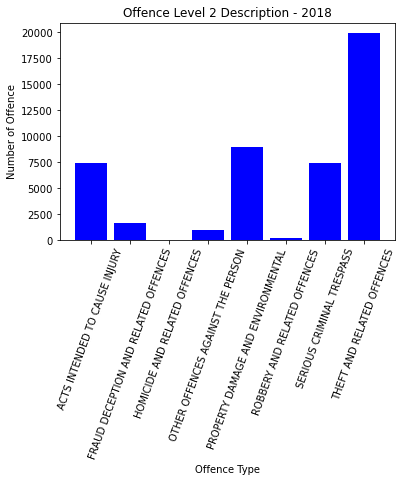

In [63]:
x_axis = total_2018_new_l2.index
y_axis = total_2018_new_l2.values
plt.bar(x_axis,y_axis, color = 'blue')
plt.xticks(rotation = 70)
plt.title ('Offence Level 2 Description - 2018')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [64]:
total_2019_l2 = crimes_2019_df.groupby(["Offence Level 2 Description"])
total_2019_new_l2 = total_2019_l2.count()['Offence count']
total_2019_new_l2

Offence Level 2 Description
ACTS INTENDED TO CAUSE INJURY           14350
FRAUD DECEPTION AND RELATED OFFENCES     3584
HOMICIDE AND RELATED OFFENCES              36
OTHER OFFENCES AGAINST THE PERSON        1668
PROPERTY DAMAGE AND ENVIRONMENTAL       17884
ROBBERY AND RELATED OFFENCES              605
SERIOUS CRIMINAL TRESPASS               15014
THEFT AND RELATED OFFENCES              44019
Name: Offence count, dtype: int64

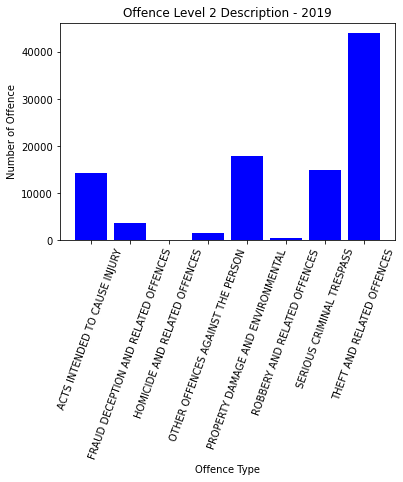

In [65]:
x_axis = total_2019_new_l2.index
y_axis = total_2019_new_l2.values
plt.bar(x_axis,y_axis, color = 'blue')
plt.xticks(rotation = 70)
plt.title ('Offence Level 2 Description - 2019')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [66]:
total_2020_l2 = crimes_2020_df.groupby(["Offence Level 2 Description"])
total_2020_new_l2 = total_2020_l2.count()['Offence count']
total_2020_new_l2

Offence Level 2 Description
ACTS INTENDED TO CAUSE INJURY           15279
FRAUD DECEPTION AND RELATED OFFENCES     2669
HOMICIDE AND RELATED OFFENCES              31
OTHER OFFENCES AGAINST THE PERSON        1288
PROPERTY DAMAGE AND ENVIRONMENTAL       16700
ROBBERY AND RELATED OFFENCES              470
SERIOUS CRIMINAL TRESPASS               11485
THEFT AND RELATED OFFENCES              36104
Name: Offence count, dtype: int64

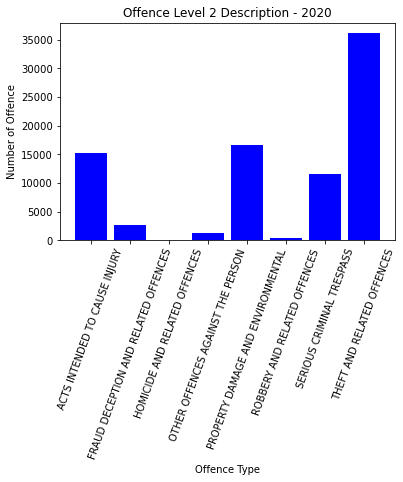

In [67]:
x_axis = total_2020_new_l2.index
y_axis = total_2020_new_l2.values
plt.bar(x_axis,y_axis, color = 'blue')
plt.xticks(rotation = 70)
plt.title ('Offence Level 2 Description - 2020')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [30]:
#total_2018 = clean_crime_data_2018.groupby(["Offence Level 3 Description"])
#total_2018_new = total_2018.count()['Offence count']
#total_2019 = clean_crime_data_2019.groupby(["Offence Level 3 Description"])
#total_2019_new = total_2019.count()['Offence count']
#total_2020 = clean_crime_data_2020.groupby(["Offence Level 3 Description"])
#total_2020_new = total_2020.count()['Offence count']
#print("YEAR 2018-2019")
#print(total_2018_new)
#print("--------------------------------------")
#print("YEAR 2019-2020")
#print(total_2019_new)
#print("--------------------------------------")
#print("YEAR 2020-2021")
#print(total_2020_new)

In [68]:
total_2018_l3 = crimes_2018_df.groupby(["Offence Level 3 Description"])
total_2018_new_l3 = total_2018_l3.count()['Offence count']
total_2018_new_l3

Offence Level 3 Description
Abduction, harassment and other offences        309
Aggravated robbery                              174
Assault police                                  334
Blackmail and extortion                          33
Common Assault                                 3041
Dangerous or negligent acts                     326
Graffiti                                        773
Murder                                           10
Non-aggravated robbery                           54
Obtain benefit by deception                    1313
Other acts intended to cause injury             233
Other fraud, deception and related offences     396
Other homicide and related offences              16
Other property damage and environmental        7528
Other theft                                    9366
Other unlawful entry with intent               1577
Property damage by fire or explosion            667
Receive or handle proceeds of crime             783
SCT - Non Residence                 

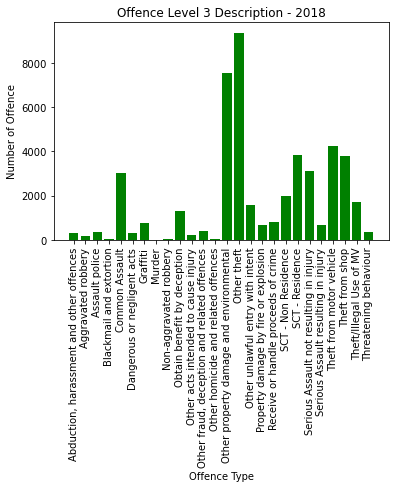

In [32]:
x_axis = total_2018_new_l3.index
y_axis = total_2018_new_l3.values
plt.bar(x_axis,y_axis, color = 'green')
plt.xticks(rotation = 90)
plt.title ('Offence Level 3 Description - 2018')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [33]:
total_2019_l3 = crimes_2019_df.groupby(["Offence Level 3 Description"])
total_2019_new_l3 = total_2019_l3.count()['Offence count']
total_2019_new_l3

Offence Level 3 Description
Abduction, harassment and other offences         445
Aggravated robbery                               433
Assault police                                   491
Blackmail and extortion                           58
Common Assault                                  4743
Dangerous or negligent acts                      547
Graffiti                                        1485
Murder                                            13
Non-aggravated robbery                           114
Obtain benefit by deception                     2572
Other acts intended to cause injury              460
Other fraud, deception and related offences     1012
Other homicide and related offences               23
Other property damage and environmental        15179
Other theft                                    20600
Other unlawful entry with intent                3059
Property damage by fire or explosion            1220
Receive or handle proceeds of crime             1462
SCT - Non Residenc

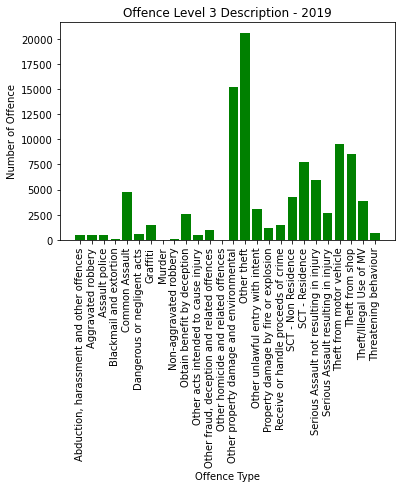

In [34]:
x_axis = total_2019_new_l3.index
y_axis = total_2019_new_l3.values
plt.bar(x_axis,y_axis, color = 'green')
plt.xticks(rotation = 90)
plt.title ('Offence Level 3 Description - 2019')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [35]:
total_2020_l3 = crimes_2020_df.groupby(["Offence Level 3 Description"])
total_2020_new_l3 = total_2020_l3.count()['Offence count']
total_2020_new_l3

Offence Level 3 Description
Abduction, harassment and other offences         411
Aggravated robbery                               333
Assault police                                   384
Blackmail and extortion                           50
Common Assault                                  2027
Dangerous or negligent acts                      249
Graffiti                                        1474
Murder                                             7
Non-aggravated robbery                            87
Obtain benefit by deception                     1906
Other acts intended to cause injury              647
Other fraud, deception and related offences      763
Other homicide and related offences               24
Other property damage and environmental        14312
Other theft                                    16698
Other unlawful entry with intent                2611
Property damage by fire or explosion             914
Receive or handle proceeds of crime             1220
SCT - Non Residenc

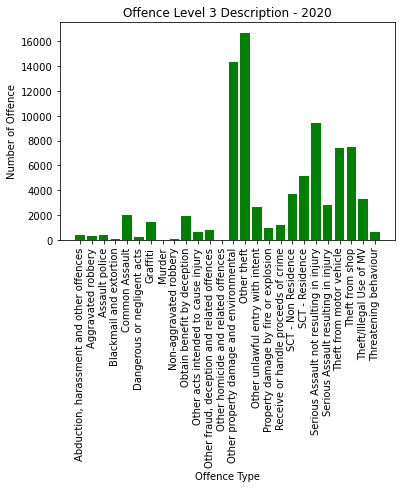

In [36]:
x_axis = total_2020_new_l3.index
y_axis = total_2020_new_l3.values
plt.bar(x_axis,y_axis, color = 'green')
plt.xticks(rotation = 90)
plt.title ('Offence Level 3 Description - 2020')
plt.xlabel('Offence Type')
plt.ylabel('Number of Offence')
plt.show()

In [72]:
frames_2018_2019 = [total_2018_new, total_2019_new]
result_2018_2019 = pd.merge(total_2018_new_l1, total_2019_new_l1, on= "Offence Level 1 Description")
frame_final = [result_2018_2019, total_2020_new_l1]
result_l1 = pd.merge(result_2018_2019, total_2020_new_l1, on= "Offence Level 1 Description")

result_l1_new = result_l1.rename(columns = {"Offence count_x":"Offence 2018","Offence count_y":"Offence 2019",
                                                   "Offence count":"Offence 2020"})
result_l1_new

,Offence 2018,Offence 2019,Offence 2020
Offence Level 1 Description,,,
OFFENCES AGAINST PROPERTY,37982,80501,66958
OFFENCES AGAINST THE PERSON,8679,16659,17068


In [71]:
frames_2018_2019 = [total_2018_new, total_2019_new]
result_2018_2019 = pd.merge(total_2018_new_l2, total_2019_new_l2, on= "Offence Level 2 Description")
frame_final = [result_2018_2019, total_2020_new_l2]
result_l2 = pd.merge(result_2018_2019, total_2020_new_l2, on= "Offence Level 2 Description")

result_l2_new = result_l2.rename(columns = {"Offence count_x":"Offence 2018","Offence count_y":"Offence 2019",
                                                   "Offence count":"Offence 2020"})
result_l2_new

,Offence 2018,Offence 2019,Offence 2020
Offence Level 2 Description,,,
ACTS INTENDED TO CAUSE INJURY,7390,14350,15279
FRAUD DECEPTION AND RELATED OFFENCES,1709,3584,2669
HOMICIDE AND RELATED OFFENCES,26,36,31
OTHER OFFENCES AGAINST THE PERSON,1002,1668,1288
PROPERTY DAMAGE AND ENVIRONMENTAL,8968,17884,16700
ROBBERY AND RELATED OFFENCES,261,605,470
SERIOUS CRIMINAL TRESPASS,7404,15014,11485
THEFT AND RELATED OFFENCES,19901,44019,36104


In [50]:
frames_2018_2019 = [total_2018_new, total_2019_new]
result_2018_2019 = pd.merge(total_2018_new, total_2019_new, on= "Offence Level 3 Description")
frame_final = [result_2018_2019, total_2020_new]
result_l3 = pd.merge(result_2018_2019, total_2020_new, on= "Offence Level 3 Description")

result_l3_new = result_l3.rename(columns = {"Offence count_x":"Offence 2018","Offence count_y":"Offence 2019",
                                                   "Offence count":"Offence 2020"})
result_l3_new

,Offence 2018,Offence 2019,Offence 2020
Offence Level 3 Description,,,
"Abduction, harassment and other offences",309,445,411
Aggravated robbery,174,433,333
Assault police,334,491,384
Blackmail and extortion,33,58,50
Common Assault,3041,4743,2027
Dangerous or negligent acts,326,547,249
Graffiti,773,1485,1474
Murder,10,13,7
Non-aggravated robbery,54,114,87
